<a href="https://colab.research.google.com/github/Tar-ive/Portfolio-Optimizer/blob/main/ML_models_for_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'NVDA', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'NVDA', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, NVDA, MSFT, AMZN]
company_name = ["APPLE", "NVIDIA", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-03-04,177.529999,180.139999,177.490005,177.580002,177.580002,37381500,AMAZON
2024-03-05,176.929993,176.929993,173.300003,174.119995,174.119995,37228300,AMAZON
2024-03-06,175.539993,176.460007,173.259995,173.509995,173.509995,32090900,AMAZON
2024-03-07,174.830002,177.990005,173.720001,176.820007,176.820007,34063300,AMAZON
2024-03-08,176.440002,178.789993,174.330002,175.350006,175.350006,37853500,AMAZON
2024-03-11,174.309998,174.470001,171.470001,171.960007,171.960007,28484800,AMAZON
2024-03-12,173.500000,176.759995,171.979996,175.389999,175.389999,36610600,AMAZON
2024-03-13,175.899994,177.619995,175.550003,176.559998,176.559998,30772600,AMAZON
2024-03-14,177.690002,179.529999,176.470001,178.750000,178.750000,43677900,AMAZON


In [3]:
AAPL.describe()


,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,179.985297,181.453755,178.667905,180.172347,179.678592,5.741485e+07
std,10.474439,10.301204,10.386906,10.286331,10.398460,1.675599e+07
min,151.190002,153.250000,149.919998,152.990005,152.177734,2.404830e+07
25%,172.940002,174.059998,171.600006,173.000000,172.638504,4.679290e+07
50%,180.089996,181.929993,178.330002,180.570007,179.859741,5.343900e+07
75%,189.259995,189.990005,187.610001,189.300003,188.850006,6.384130e+07
max,198.020004,199.619995,197.000000,198.110001,197.857529,1.366826e+08


In [4]:
AAPL.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-03-15 to 2024-03-15
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


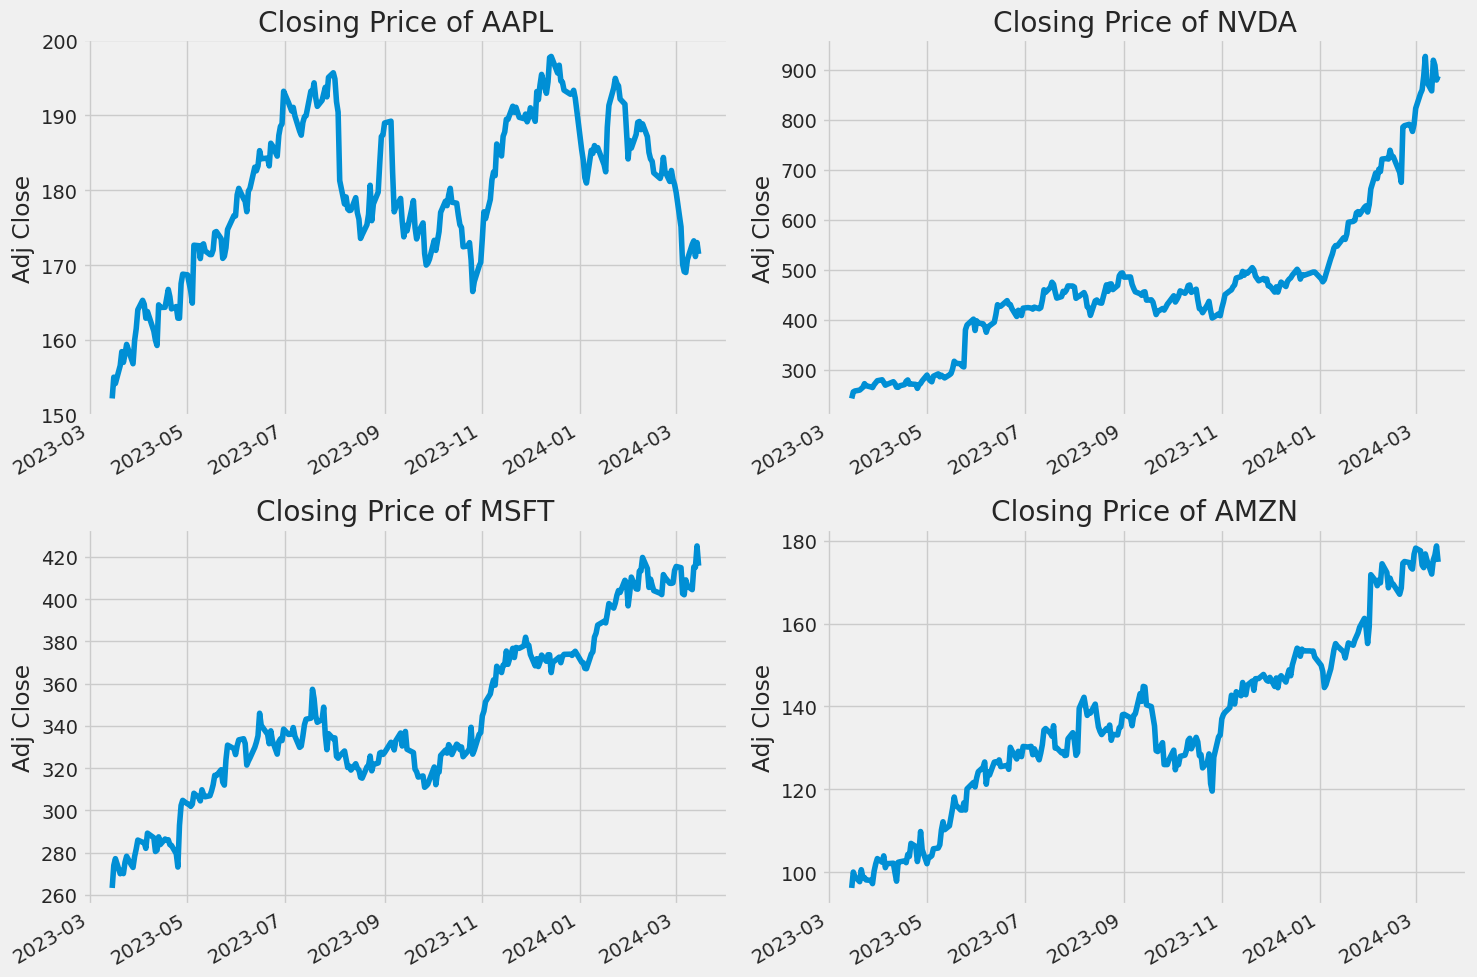

In [5]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

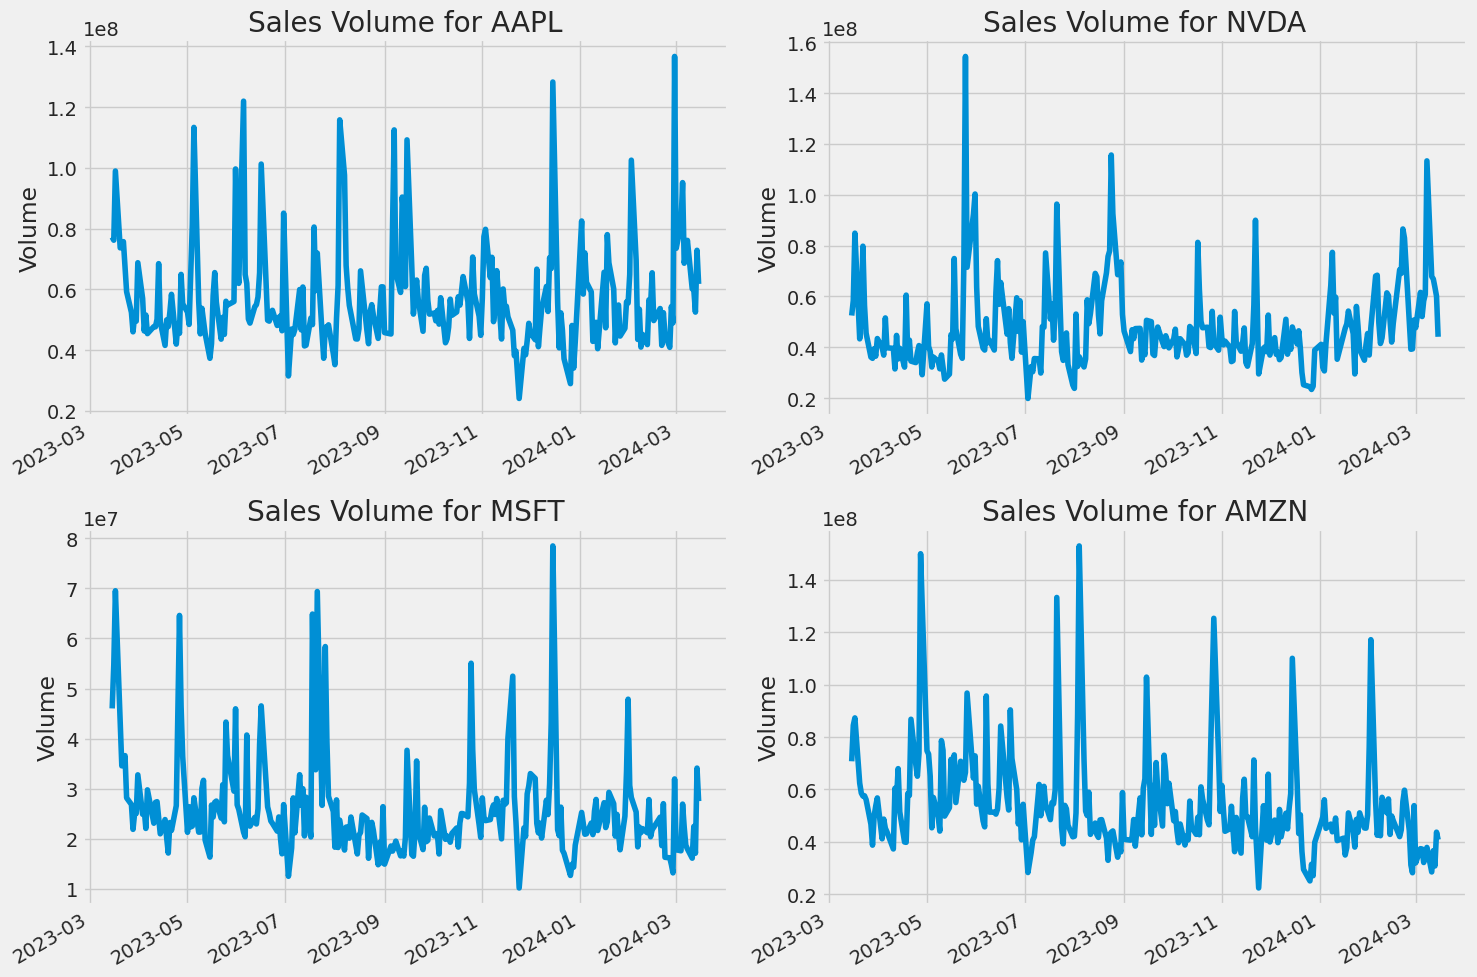

In [6]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

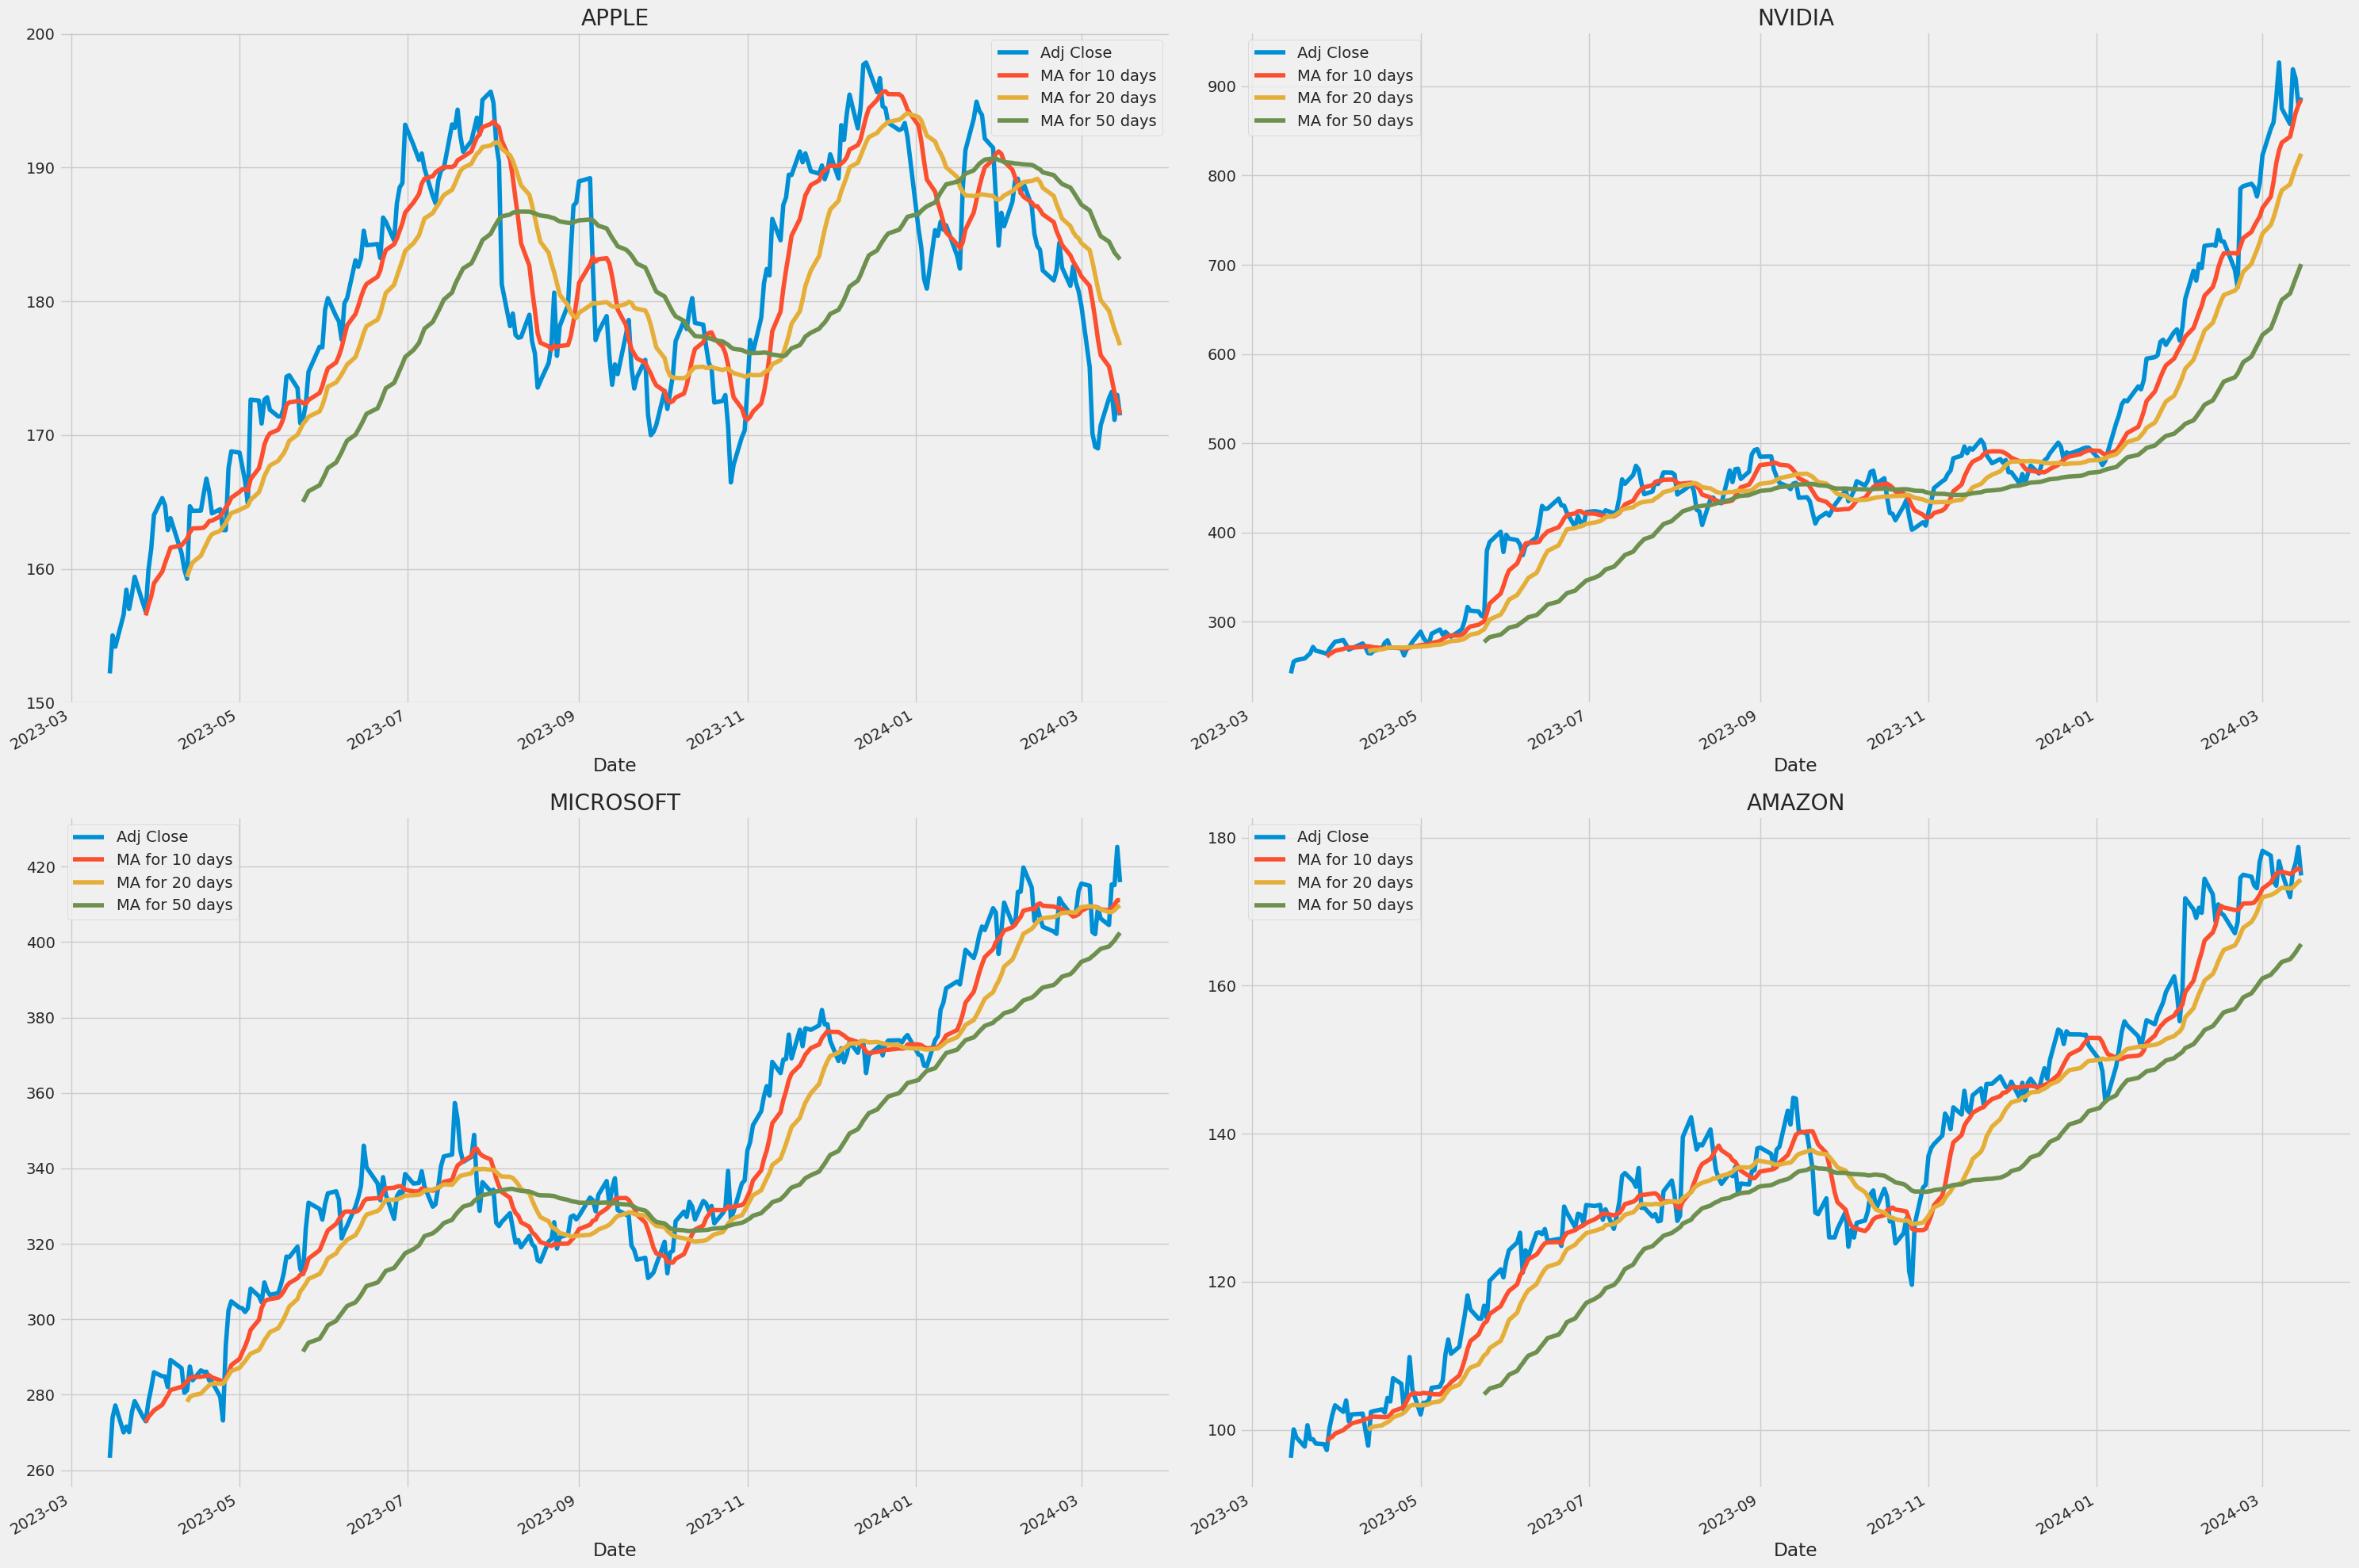

In [8]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(30)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

NVDA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('NVIDIA')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

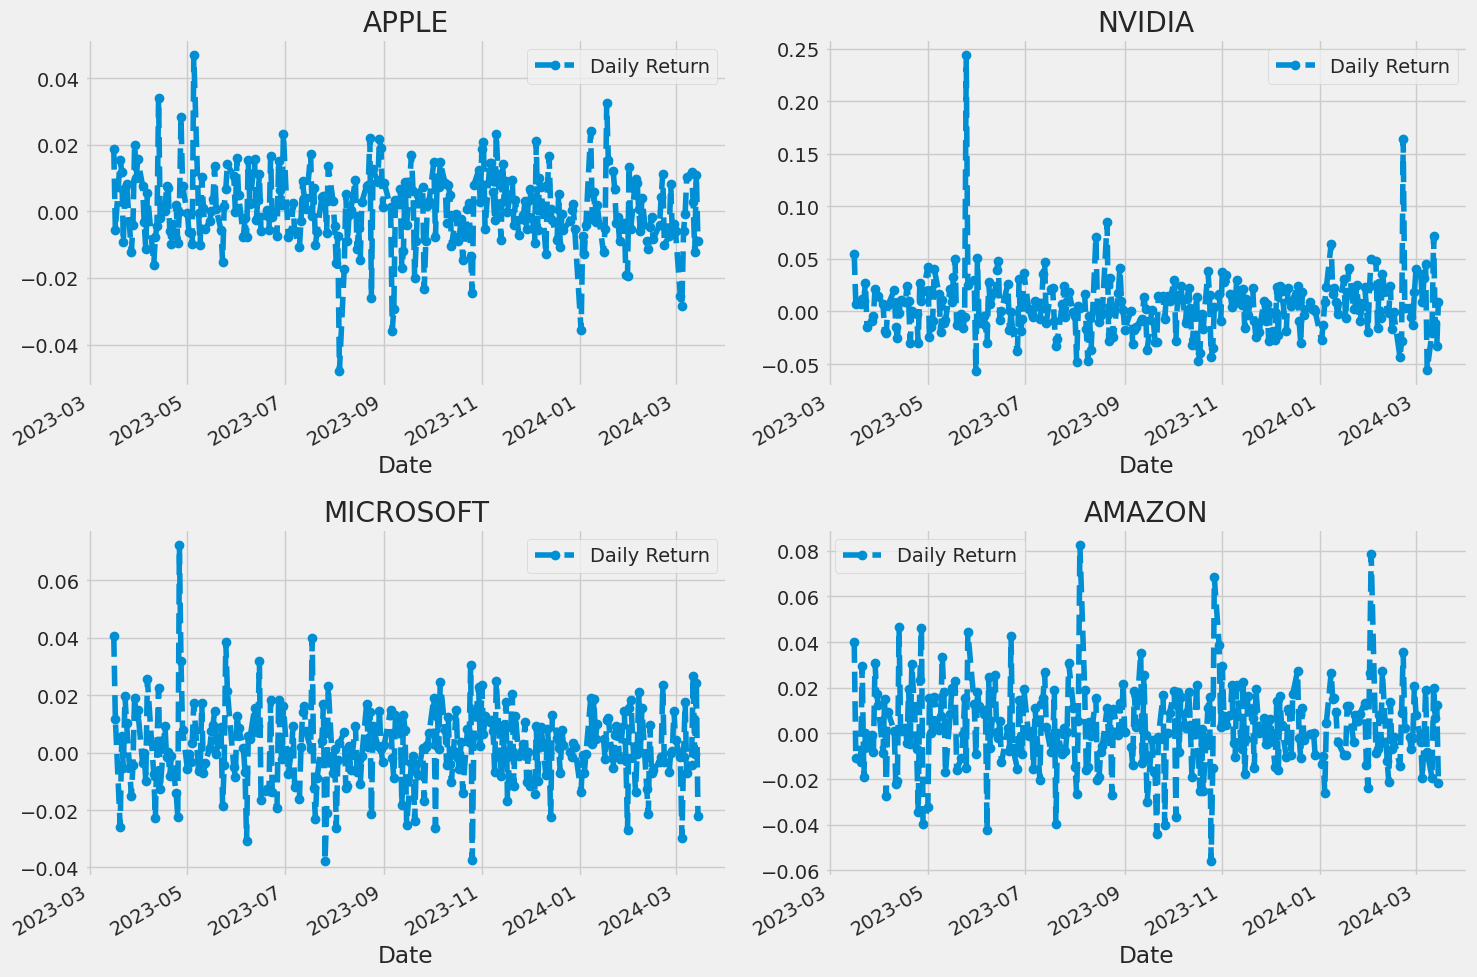

In [9]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

NVDA['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('NVIDIA')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

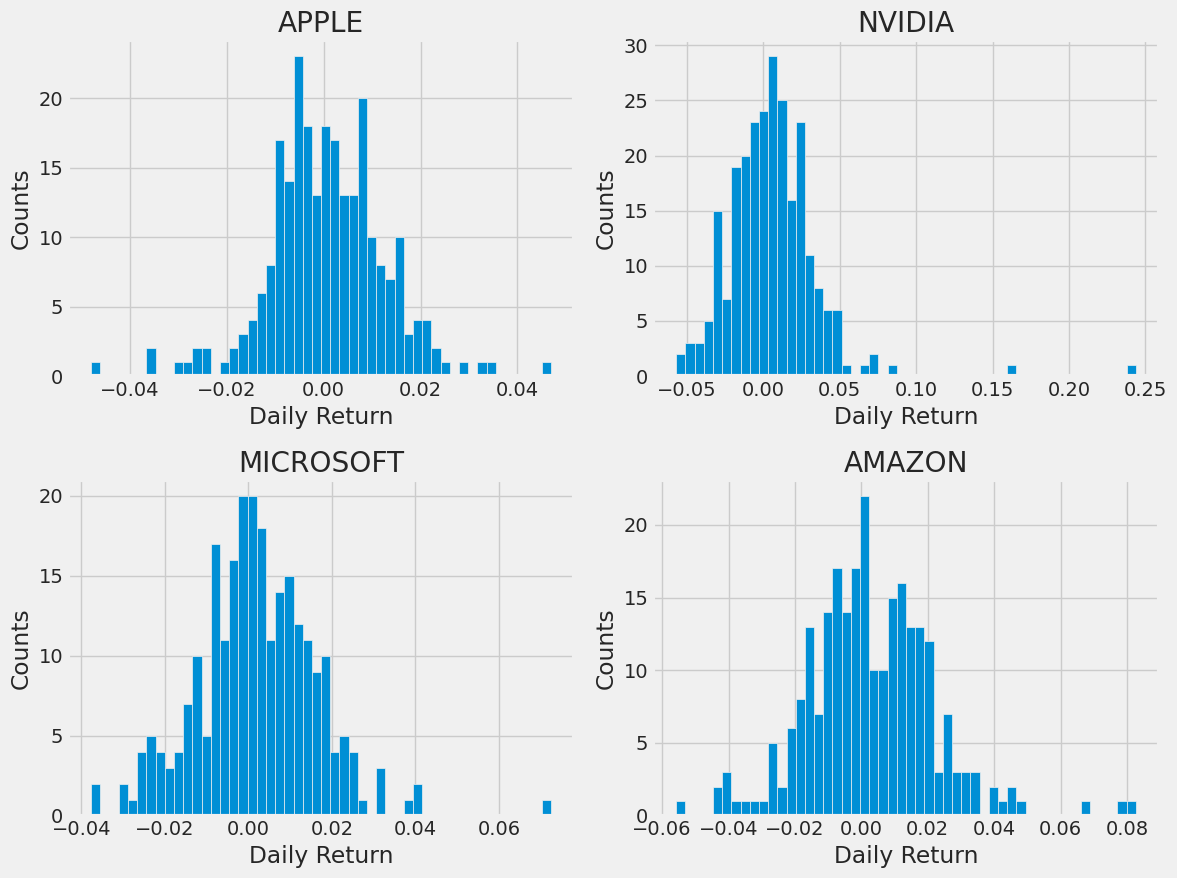

In [10]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [11]:
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,MSFT,NVDA
Date,,,,
2023-03-15,NaN,NaN,NaN,NaN
2023-03-16,0.018694,0.039917,0.040536,0.054194
2023-03-17,-0.005454,-0.010896,0.011694,0.007204
2023-03-20,0.015484,-0.012532,-0.025767,0.006803
2023-03-21,0.011944,0.029680,0.005694,0.011544


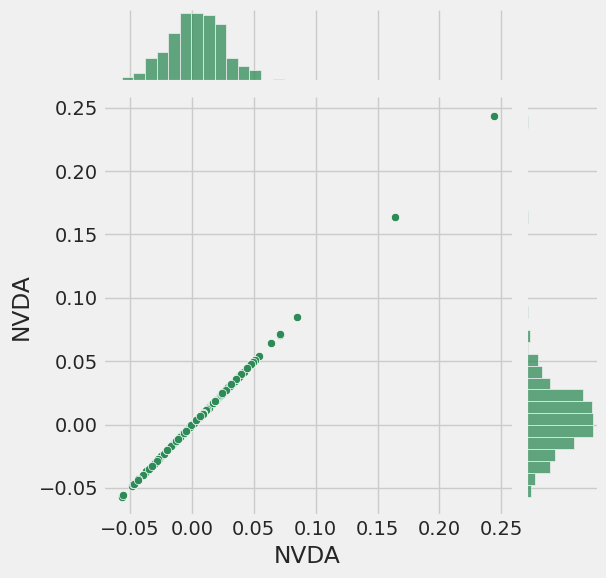

In [12]:
sns.jointplot(x='NVDA', y='NVDA', data=tech_rets, kind='scatter', color='seagreen')

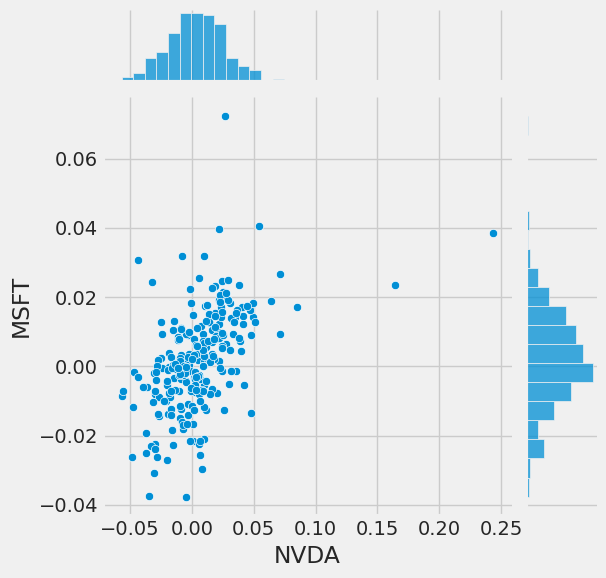

In [13]:
sns.jointplot(x='NVDA', y='MSFT', data=tech_rets, kind='scatter')

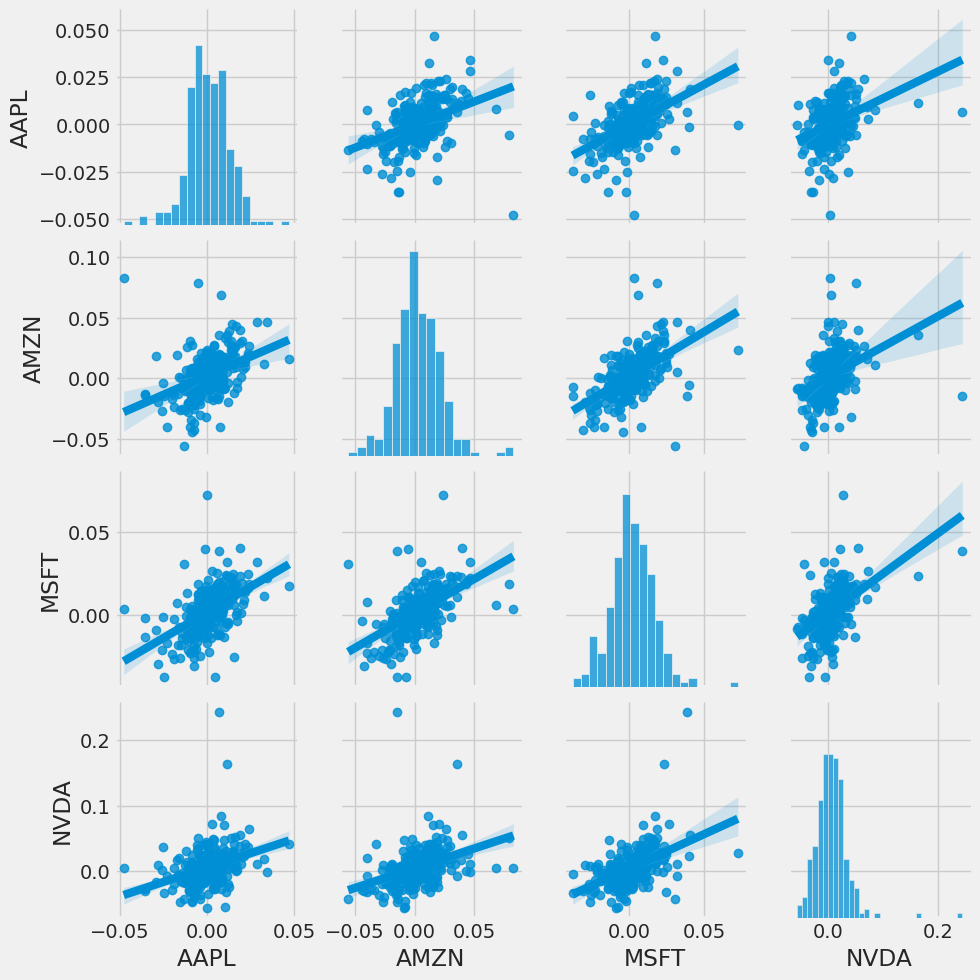

In [14]:
sns.pairplot(tech_rets, kind='reg')

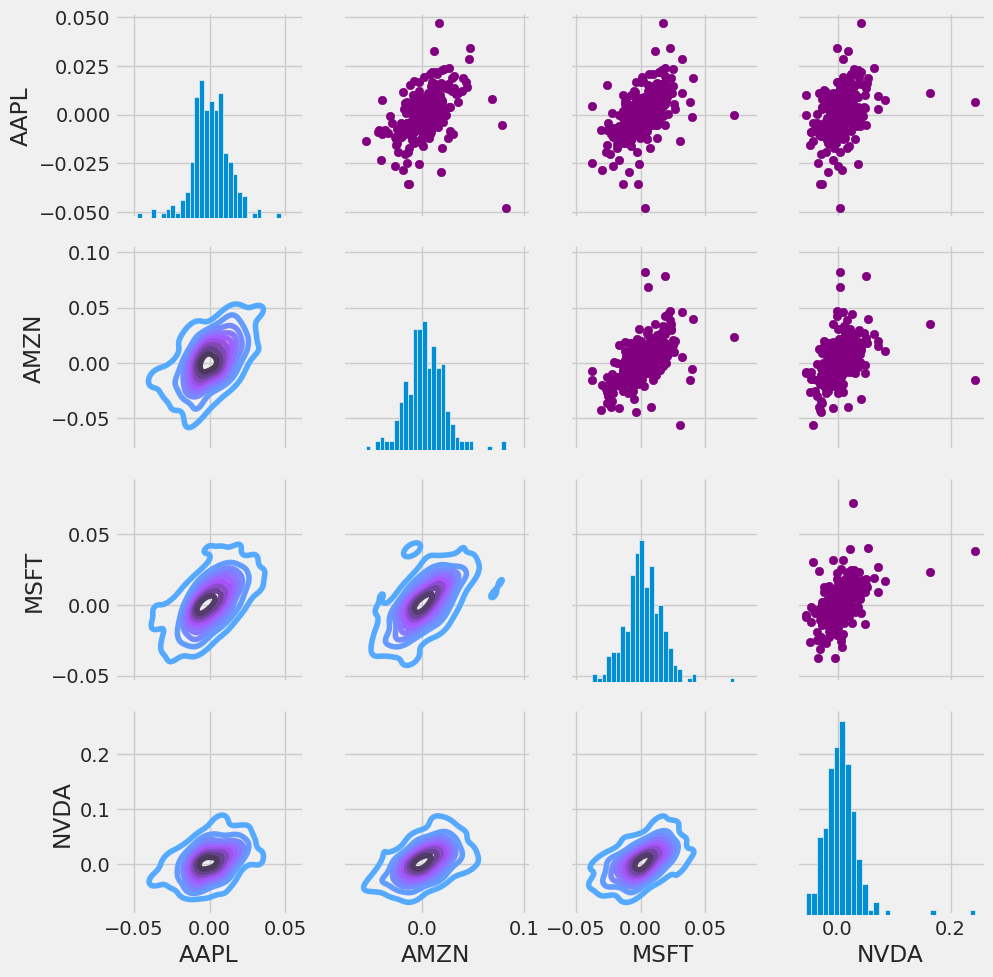

In [15]:
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

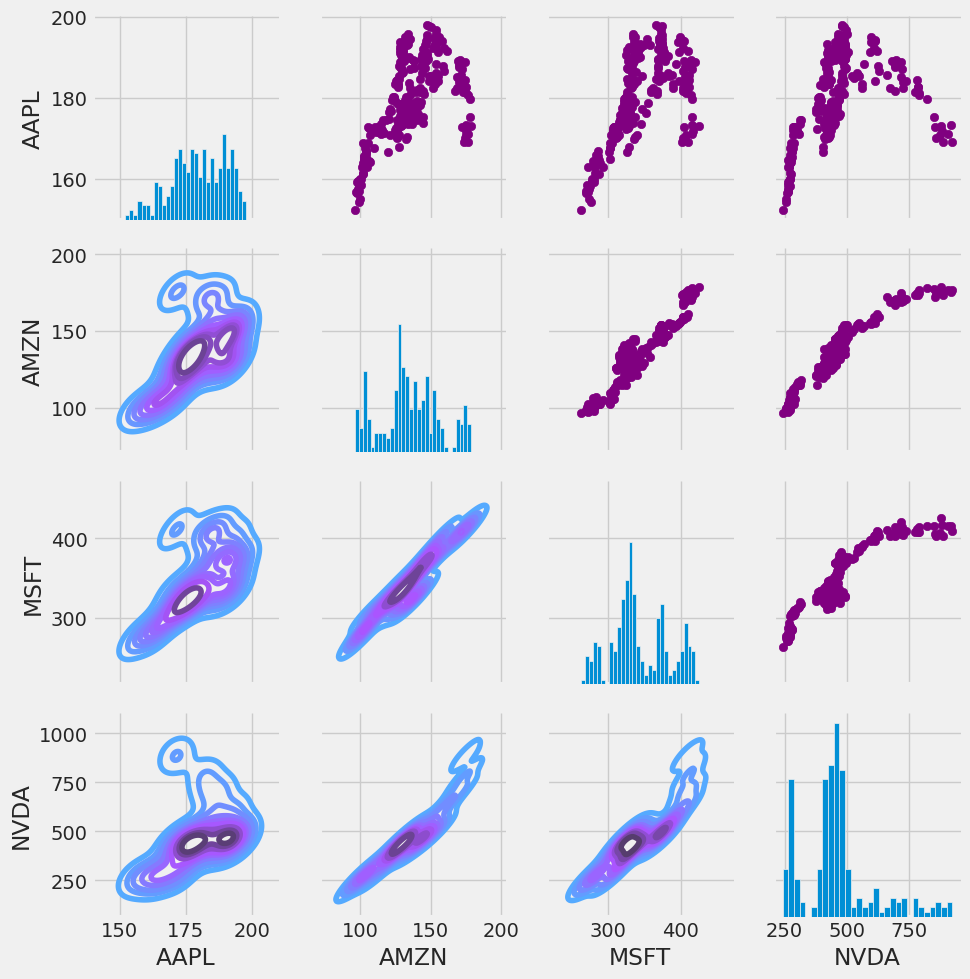

In [16]:
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

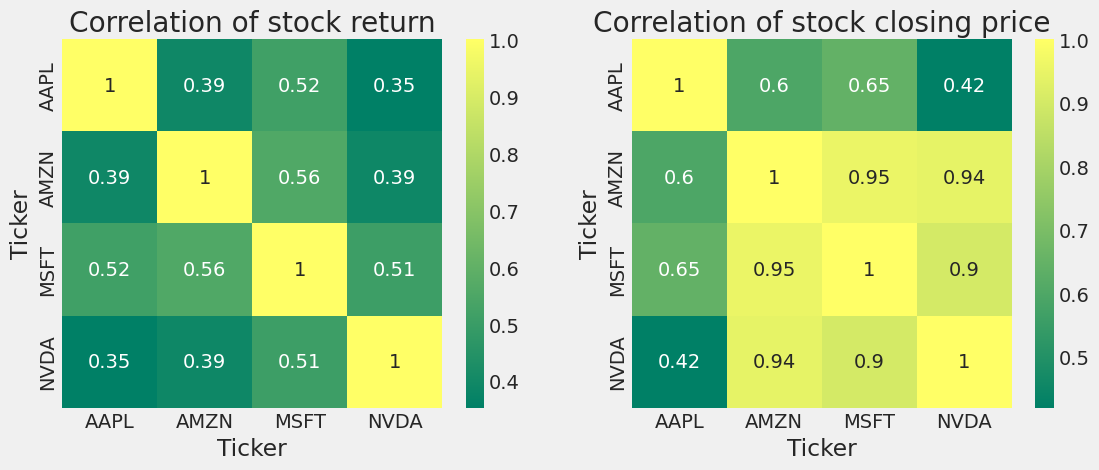

In [17]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

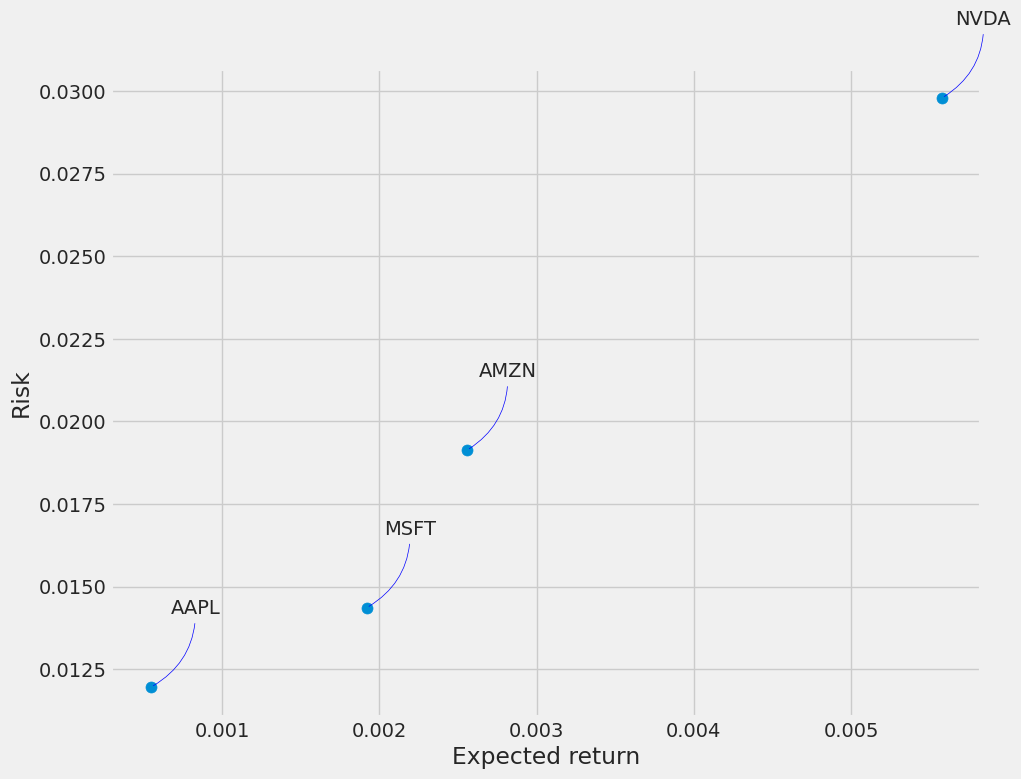

In [18]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [23]:
df = pdr.get_data_yahoo('NVDA', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,3.575000,3.600000,3.502500,3.510000,3.219731,46804400
2012-01-04,3.512500,3.565000,3.480000,3.550000,3.256423,34737200
2012-01-05,3.532500,3.695000,3.517500,3.677500,3.373379,56354800
2012-01-06,3.675000,3.677500,3.592500,3.635000,3.334393,53325200
2012-01-09,3.637500,3.705000,3.610000,3.635000,3.334393,50824400
...,...,...,...,...,...,...
2024-03-11,864.289978,887.969971,841.659973,857.739990,857.739990,67836400
2024-03-12,880.489990,919.599976,861.500000,919.130005,919.130005,66807500
2024-03-13,910.549988,915.039978,884.349976,908.880005,908.880005,63571300


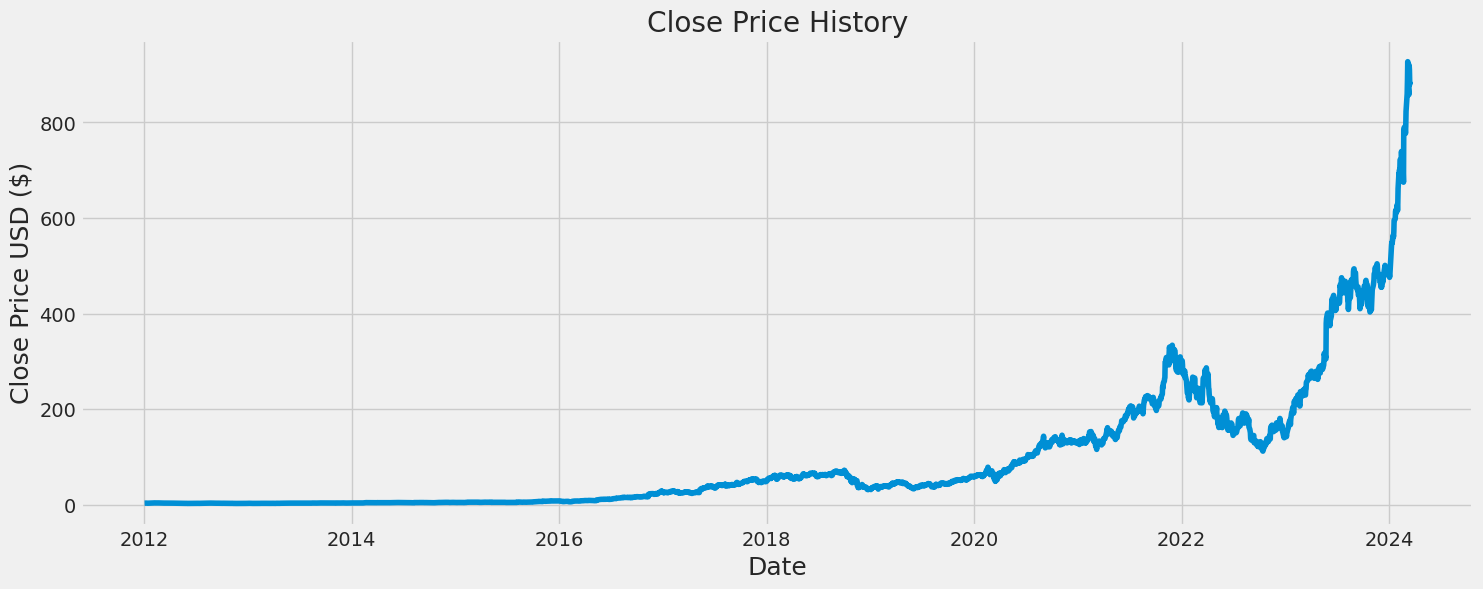

In [24]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [25]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2917

In [26]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[7.19817675e-04],
       [7.63114940e-04],
       [9.01125166e-04],
       ...,
       [9.80721877e-01],
       [9.48855057e-01],
       [9.54878005e-01]])

In [27]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00071982, 0.00076311, 0.00090113, 0.00085512, 0.00085512,
       0.00083889, 0.00076041, 0.00073605, 0.00063593, 0.0005791 ,
       0.00070358, 0.00080371, 0.00076853, 0.00087406, 0.00096336,
       0.00093901, 0.00090113, 0.00095525, 0.00092548, 0.00091736,
       0.00096066, 0.0011122 , 0.0012015 , 0.00116903, 0.00117985,
       0.0013341 , 0.00133139, 0.00122315, 0.0012908 , 0.00131516,
       0.00129621, 0.00137198, 0.00120962, 0.00123127, 0.0012015 ,
       0.00122585, 0.00119338, 0.00110679, 0.0010689 , 0.00102019,
       0.00104725, 0.00108243, 0.00094172, 0.00090383, 0.00092819,
       0.00094172, 0.00093089, 0.00086865, 0.00092277, 0.00080912,
       0.00086595, 0.00087136, 0.00088218, 0.00081724, 0.00083347,
       0.00082806, 0.00085783, 0.00090383, 0.00093089, 0.0010229 ])]
[0.0010418412768755602]

[array([0.00071982, 0.00076311, 0.00090113, 0.00085512, 0.00085512,
       0.00083889, 0.00076041, 0.00073605, 0.00063593, 0.0005791 ,
       0.00070358, 0.00080371, 0.

In [28]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=3)

Epoch 1/3
2857/2857 [==============================] - 181s 62ms/step - loss: 3.0658e-04
Epoch 2/3
2857/2857 [==============================] - 183s 64ms/step - loss: 1.9289e-04
Epoch 3/3
2857/2857 [==============================] - 166s 58ms/step - loss: 1.4177e-04


In [29]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 36ms/step


33.84444767102943

<ipython-input-31-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


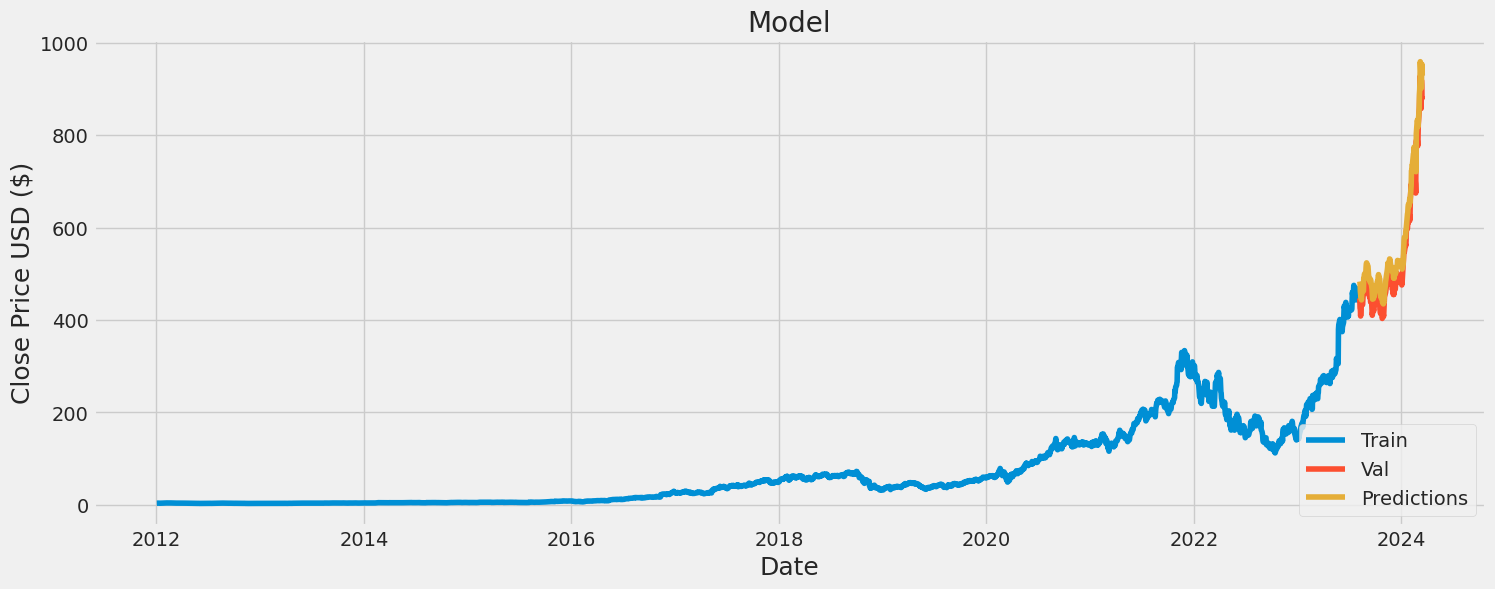

In [31]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [40]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(actual_prices)), y=actual_prices.flatten(), mode='lines', name='Actual Prices'))
fig.add_trace(go.Scatter(x=np.arange(len(predicted_prices)), y=predicted_prices.flatten(), mode='lines', name='Predicted Prices'))

fig.update_layout(title='Stock Price Prediction - LSTM Model',
                  xaxis_title='Time',
                  yaxis_title='Price',
                  legend_title='Legend')

fig.show()

In [32]:
valid

,Close,Predictions
Date,,
2023-08-08,446.640015,483.356110
2023-08-09,425.540009,479.640198
2023-08-10,423.880005,462.343536
2023-08-11,408.549988,455.803650
2023-08-14,437.529999,443.435760
...,...,...
2024-03-11,857.739990,925.511719
2024-03-12,919.130005,902.072205
2024-03-13,908.880005,947.836487


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Feature Engineering: Create a new column for previous day's closing price
df['Prev Close'] = df['Close'].shift(1)

# Drop the first row since it will have NaN value for 'Prev Close'
df = df.dropna()

# Define the features (X) and the target (y)
X = df[['Prev Close']]  # Features: previous day's close price
y = df['Close']  # Target: current day's close price

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the stock prices
predictions = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)

# Output the MSE
mse


41.06571053788149

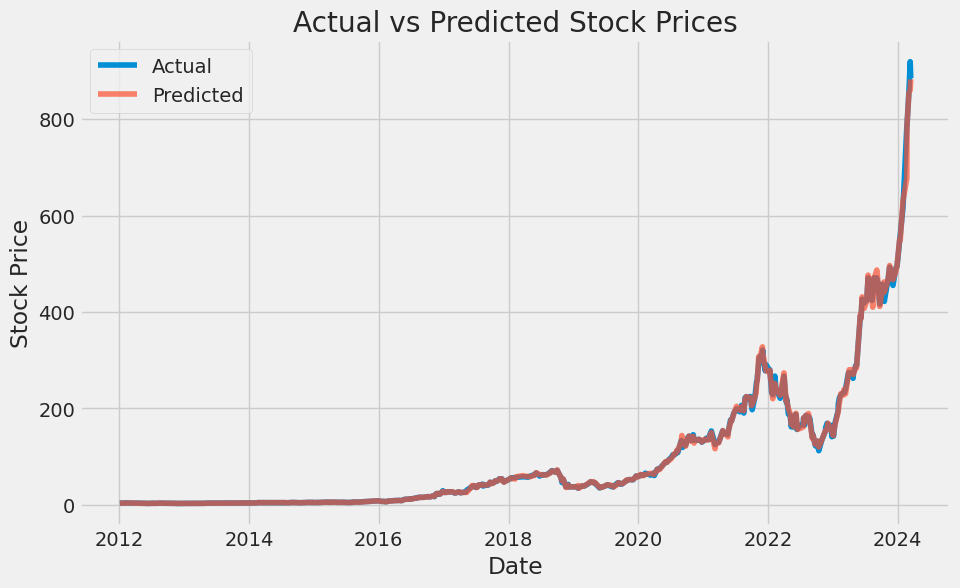

In [34]:
import matplotlib.pyplot as plt

# Create a DataFrame with actual and predicted values for easy plotting
results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
results = results.sort_index()

plt.figure(figsize=(10,6))

# Plotting the actual values
plt.plot(results['Actual'], label='Actual')

# Plotting the predicted values
plt.plot(results['Predicted'], label='Predicted', alpha=0.7)

plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [39]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(actual_prices)), y=actual_prices.flatten(), mode='lines', name='Actual Prices'))
fig.add_trace(go.Scatter(x=np.arange(len(predicted_prices)), y=predicted_prices.flatten(), mode='lines', name='Predicted Prices'))

fig.update_layout(title='Stock Price Prediction - Linear Regression Model',
                  xaxis_title='Time',
                  yaxis_title='Price',
                  legend_title='Legend')

fig.show()

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Assuming 'df' is your DataFrame and 'Close' is the column you want to predict

# Data normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1,1))

# Creating the training data set
# Create a scaled training data set
train_data = scaled_data[0:int(len(df)*0.8), :]

# Split the data into x_train and y_train data sets
x_train, y_train = [], []

# Assuming you're using 60 days of data to predict the next day
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data into the shape accepted by the GRU
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the GRU model
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(GRU(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

# The template ends here as you'll need to prepare your test dataset in a similar manner to make predictions


2395/2395 [==============================] - 83s 32ms/step - loss: 7.0464e-05


20/20 [==============================] - 1s 15ms/step


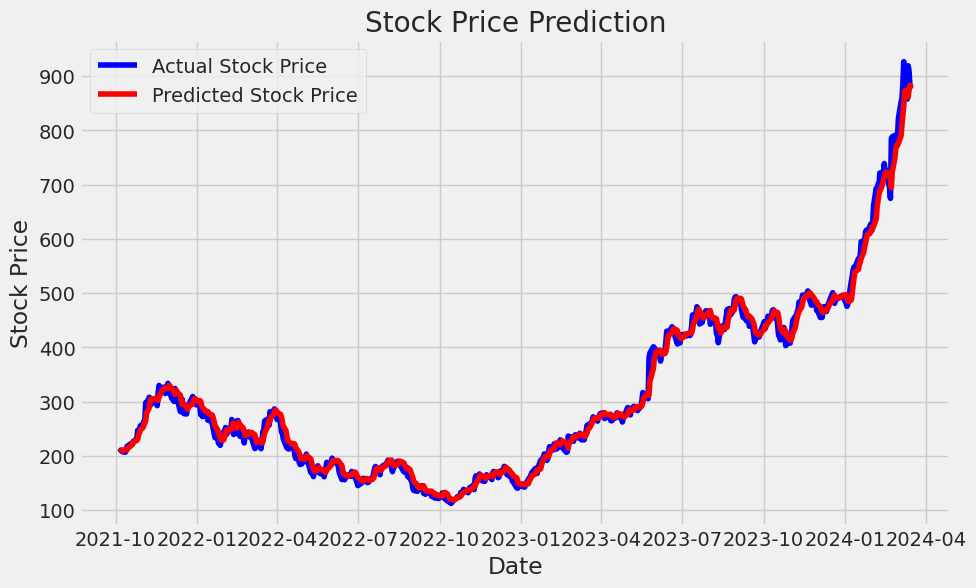

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and you've already trained your GRU model

# Prepare the test data (similar to the training data)
# Let's say you've already split your data and 'test_data' is your testing dataset
test_data = scaled_data[int(len(df)*0.8) - 60:, :]

# Create the x_test and y_test datasets
x_test, y_test = [], df['Close'][int(len(df)*0.8):]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert data to a numpy array
x_test = np.array(x_test)

# Reshape the data into the shape accepted by the GRU
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Make predictions
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)  # Inverse transform to get actual price scale

# Visualize the results
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test, color='blue', label='Actual Stock Price')
plt.plot(y_test.index, predicted_prices, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [37]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import plotly.graph_objects as go

# Assuming 'test_data' is the scaled data you've reserved for testing

# Prepare the test dataset
x_test, y_test = [], []
test_data = scaled_data[int(len(df)*0.8)-60:, :]  # Adjust based on your training data split

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Make predictions
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)  # Inverse scaling

# Inverse scaling the actual test prices for plotting
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Visualize the predictions and actual prices using Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(actual_prices)), y=actual_prices.flatten(), mode='lines', name='Actual Prices'))
fig.add_trace(go.Scatter(x=np.arange(len(predicted_prices)), y=predicted_prices.flatten(), mode='lines', name='Predicted Prices'))

fig.update_layout(title='Stock Price Prediction - GRU Model',
                  xaxis_title='Time',
                  yaxis_title='Price',
                  legend_title='Legend')

fig.show()


20/20 [==============================] - 1s 26ms/step
